# Homework 3, Part 1: Multiclass Classification

In this homework, we will implement a one-vs-all logistic regression classifier to recognize hand-written digits. There are more than 2 discrete values (namely, 10), so therefore this is a multiclass classification problem. One-vs-all is the technique taught to solve a problem set up like this.

For part 1, use:
* x3.m (Octave/MATLAB script that steps you through part 1)
* ex3data1.mat (Training set of hand-written digits)
* lrCostFunction.m (Logistic regression cost function)
* oneVsAll.m (Train a one-vs-all multi-class classifier)
* predictOneVsAll.m (Predict using a one-vs-all multi-class classifier [⋆] predict.m - Neural network prediction function)

## Import Dataset

The dataset is in a .mat format, which is Matlab's native matrix format. We can use the scipy.io module's loadmat function to load .mat files as numpy nd-arrays.

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = loadmat("ex3data1.mat")

print("Some properties of ex3data1.mat:")
print(type(raw_data))
print(raw_data.keys())

Some properties of ex3data1.mat:
<class 'dict'>
dict_keys(['X', '__header__', '__globals__', 'y', '__version__'])


It looks like the dictionary has an X and a y key, which, by the looks of the dictionarys, are numpy ndarrays. We can set these to our own variables.

In [2]:
# Looking at X
print("Taking a look at X matrix: \n{}\n".format(raw_data["X"]))

# What does a sample of X look like?
print("Shape of a sample (example) of X: \n{} --> 20 x 20 image of digit, flattened to 400x1\n"\
      .format(raw_data["X"][50, :].shape))

# What is the total size of the training set? 5000 samples x 400 features (pixels) == 20000
print("Total size of training set: {}".format(raw_data["X"].size))

X = raw_data["X"]

Taking a look at X matrix: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

Shape of a sample (example) of X: 
(400,) --> 20 x 20 image of digit, flattened to 400x1

Total size of training set: 2000000


In [3]:
# Looking at Y
print("Look at y: {}\n".format(raw_data["y"]))

# Shape of y
print("Shape of y: {}".format(raw_data["y"].shape))

y = raw_data["y"]

Look at y: [[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]

Shape of y: (5000, 1)


## Visualizing the Dataset

Visualizing two samples, reshaping 400x1 to 20x20, viz using plt.imshow()


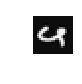

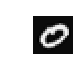

In [4]:
print("Visualizing two samples, reshaping 400x1 to 20x20, viz using plt.imshow()")

single_sample = np.expand_dims(X[1324], axis=0)
single_sample = single_sample.reshape((20, 20))

another_sample = np.expand_dims(X[321], axis=0)
another_sample = another_sample.reshape((20, 20))

plt.figure(figsize = (0.5,0.5))
plt.gray()
plt.imshow(single_sample, interpolation='nearest')
plt.axis("off")
plt.show()

plt.figure(figsize = (0.5,0.5))
plt.imshow(another_sample, interpolation='nearest')
plt.axis("off")
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [62]:
# Defining a regularized cost function to use for an advanced optimization method -- note y is an array
def cost_function(parameters, X, y, reg_parameter):
    # Part 1: Calculating cost
    y_vector = y.ravel()
    positive_class = y * np.log(sigmoid(np.dot(X, parameters.T)))
    negative_class = (1 - y) * np.log(1 - sigmoid(np.dot(X, parameters.T)))
    reg_term = np.power(parameters, 2).sum() * (reg_parameter / (2 * len(X)))
    total_cost = ((positive_class + negative_class).sum() / -len(X)) + reg_term
    
    # Part 2: Calculating the gradient
    pred_act_diff = sigmoid(np.dot(X, parameters.T)) - y
    gradient = np.sum((X * pred_act_diff.T), axis=0)
    # np.sum((X * (sigmoid(np.dot(X, np.zeros((400, 1)))) - y)), axis=0)
    
    return total_cost, gradient

In [63]:
# Testing our cost_function
theta_t = np.array([-2.0, -1.0, 1, 2.0])
example_array = np.array([[0.1, 0.6, 1.1], [0.2, 0.7, 1.2], [0.3, 0.8, 1.3], [0.4, 0.9, 1.4], [0.5, 1.0, 1.5]])
X_t = np.append(np.ones((5, 1)), example_array, axis=1)
y_t = np.array([[1., 0., 1., 0., 1.]])
lambda_t = 3
cost_function(theta_t, X_t, y_t, lambda_t)

(3.734819396109744,
 array([ 0.73280684,  0.25720794,  0.62361136,  0.99001478]))

In [64]:
# TODO -> inspect why total_cost and gradient don't match ex3.m's proposed solution